# DATA PREPROCESSING

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cd desktop

C:\Users\hp\desktop


In [3]:
cd New folder (3)

C:\Users\hp\desktop\New folder (3)


In [4]:
# train data
train_data = pd.read_csv('train_v2.csv')
# members data
members_data = pd.read_csv('members_v3.csv')
# transactions data
transactions_data = pd.read_csv('transactions_v2.csv')
# user logs data
logs_data = pd.read_csv('user_logs_v2.csv')
# test data
test_data = pd.read_csv('sample_submission_v2.csv')

# Merging data for train data


In [5]:
# merging members data with train data
train_members = pd.merge(train_data, members_data, on='msno', how='left')

# merging transactions data with train members data
train_mem_trans = pd.merge(train_members, transactions_data, on='msno', how='left')

# merging user logs data with train members transaction data
train_dataset = pd.merge(train_mem_trans, logs_data, on='msno', how='left')

# getting head of train dataset
#pd.set_option('display.max_columns', 100)
train_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [6]:
def preprocess(data):
    # imputing 0 in place of nan values in the city column
    data['city'] = data['city'].fillna(0)
    
    # removing outliers
    data['bd'] = data['bd'].apply(lambda x: x if (x < 69.0) and (x > 0.0) else np.nan)
    # imputing 28 as age instead of nan
    data['bd'] = data['bd'].fillna(28.0)
    
    # replacing male with 1 in gender
    data['gender'] = data['gender'].replace(to_replace='male', value=1)
    # replacing male with 2 in gender
    data['gender'] = data['gender'].replace(to_replace='female', value=2)
    # replacing nan with 0 in gender
    data['gender'] = data['gender'].fillna(0)
    
    # replace 0 instead of nan in registered_via
    data['registered_via'] = data['registered_via'].fillna(0)
    
    # filling median date in place of nan in the df
    data['registration_init_time'] = data['registration_init_time'].fillna(20151010.0)
    # converting float date to datetime
    # data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')
    
    # replace 0 instead of nan in registered_via
    data['registered_via'] = data['registered_via'].fillna(0)
    
    # removing outliers
    data['payment_plan_days'] = data['payment_plan_days'].apply(lambda x: x if (x <= 30.0) else np.nan)
    # imputing 30 in place of nan in payment_plan_days
    data['payment_plan_days'] = data['payment_plan_days'].fillna(30.0)
    
    # removing outliers
    data['plan_list_price'] = data['plan_list_price'].apply(lambda x: x if (x <= 180.0) else np.nan)
    # imputing 149 in place of nan in plan_list_price
    data['plan_list_price'] = data['plan_list_price'].fillna(149.0)
    
    # imputing 0 in place of nan value in payment_method_id
    data['payment_method_id'] = data['payment_method_id'].fillna(0)
    
    # removing outliers
    data['actual_amount_paid'] = data['actual_amount_paid'].apply(lambda x: x if (x <= 180.0) else np.nan)
    # imputing 149 in place of nan in actual_amount_paid
    data['actual_amount_paid'] = data['actual_amount_paid'].fillna(149.0)
    
    # imputing 2 in place of nan values in is_auto_renew
    data['is_auto_renew'] = data['is_auto_renew'].fillna(2)
    
    # filling median date in place of nan in the df
    data['transaction_date'] = data['transaction_date'].fillna(20170311.0)
    # converting float date to datetime
    # data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%Y%m%d')
    
    # filling median date in place of nan in the df
    data['membership_expire_date'] = data['membership_expire_date'].fillna(20170421.0)
    # converting float date to datetime
    # data['membership_expire_date'] = pd.to_datetime(data['membership_expire_date'], format='%Y%m%d')
    
    # imputing 2 in place of nan values in is_cancel
    data['is_cancel'] = data['is_cancel'].fillna(2)
    
    # filling median date in place of nan in the df
    data['date'] = data['date'].fillna(20170316.0)
    # converting float date to datetime
    # data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
    
    # removing outliers
    data['num_25'] = data['num_25'].apply(lambda x: x if (x <= 15.0) else np.nan)
    # now I can impute 2 instead of nan in num_25
    data['num_25'] = data['num_25'].fillna(2.0)
    
    # removing outliers
    data['num_50'] = data['num_50'].apply(lambda x: x if (x <= 4.0) else np.nan)
    # now I can impute 0 instead of nan in num_50
    data['num_50'] = data['num_50'].fillna(1.0)

    # removing outliers
    data['num_75'] = data['num_75'].apply(lambda x: x if (x <= 3.0) else np.nan)
    # now I can impute 0 instead of nan in num_75
    data['num_75'] = data['num_75'].fillna(0)

    # removing outliers
    data['num_985'] = data['num_985'].apply(lambda x: x if (x <= 3.0) else np.nan)
    # now I can impute 0 instead of nan in num_985
    data['num_985'] = data['num_985'].fillna(0)

    # removing outliers
    data['num_100'] = data['num_100'].apply(lambda x: x if (x <= 74.0) else np.nan)
    # now I can impute 14 instead of nan in num_100
    data['num_100'] = data['num_100'].fillna(17.0)
    
    # removing outliers
    data['num_unq'] = data['num_unq'].apply(lambda x: x if (x <= 68.0) else np.nan)
    # now I can impute 16 instead of nan in num_unq
    data['num_unq'] = data['num_unq'].fillna(18.0)

    # removing outliers
    data['total_secs'] = data['total_secs'].apply(lambda x: x if (x <= 19167.549700000025) else np.nan)
    # now I can impute 3880.765 instead of nan in total_secs
    data['total_secs'] = data['total_secs'].fillna(4588.99)

In [7]:
preprocess(train_dataset)

#  Preaparing Dataset

In [8]:
%%time
# Feature - 1 to 9 (sum based features)
# Feature - 10 to 16 (mean based features)

def std(x):
    '''finding standard deviation using numpy,
    to avoid getting nan values'''
    return np.std(x)

# grouping them together for train data
temp_df_train = train_dataset.groupby('msno').agg(num_25_sum=('num_25', 'sum'),
                                num_50_sum=('num_50', 'sum'),
                                num_75_sum=('num_75', 'sum'),
                                num_985_sum=('num_985', 'sum'),
                                num_100_sum=('num_100', 'sum'),
                                num_unq_sum=('num_unq', 'sum'),
                                total_secs_sum=('total_secs', 'sum'),
                                num_25_mean=('num_25', 'mean'),
                                num_50_mean=('num_50', 'mean'),
                                num_75_mean=('num_75', 'mean'),
                                num_985_mean=('num_985', 'mean'),
                                num_100_mean=('num_100', 'mean'),
                                num_unq_mean=('num_unq', 'mean'),
                                total_secs_mean=('total_secs', 'mean'))
# merging them with the train dataset
train_dataset = pd.merge(train_dataset, temp_df_train, on='msno', how='left')

Wall time: 30.7 s


In [9]:
train_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,num_100_sum,num_unq_sum,total_secs_sum,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,249.0,208.0,65208.202,4.545455,0.454545,0.545455,0.454545,22.636364,18.909091,5928.018364
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,249.0,208.0,65208.202,4.545455,0.454545,0.545455,0.454545,22.636364,18.909091,5928.018364
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,249.0,208.0,65208.202,4.545455,0.454545,0.545455,0.454545,22.636364,18.909091,5928.018364
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,249.0,208.0,65208.202,4.545455,0.454545,0.545455,0.454545,22.636364,18.909091,5928.018364
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,249.0,208.0,65208.202,4.545455,0.454545,0.545455,0.454545,22.636364,18.909091,5928.018364


In [10]:
mean_encode = train_dataset.groupby('gender')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'gender_mean_enc'] = train_dataset['gender'].map(mean_encode)
del train_dataset["gender"]

gender
0.0    0.074407
1.0    0.127283
2.0    0.127856
Name: is_churn, dtype: float64


In [11]:
mean_encode = train_dataset.groupby('city')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'city_mean_enc'] = train_dataset['city'].map(mean_encode)
del train_dataset["city"]

city
0.0     0.083906
1.0     0.069631
3.0     0.131210
4.0     0.133819
5.0     0.132687
6.0     0.127799
7.0     0.106309
8.0     0.142899
9.0     0.125337
10.0    0.132318
11.0    0.107256
12.0    0.139945
13.0    0.127451
14.0    0.126532
15.0    0.122181
16.0    0.117568
17.0    0.089775
18.0    0.112245
19.0    0.140959
20.0    0.079720
21.0    0.143717
22.0    0.119596
Name: is_churn, dtype: float64


In [12]:
mean_encode = train_dataset.groupby('payment_method_id')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'payment_method_id_mean_enc'] = train_dataset['payment_method_id'].map(mean_encode)
del train_dataset["payment_method_id"]

payment_method_id
0.0     0.639020
3.0     1.000000
6.0     1.000000
8.0     0.865285
10.0    0.124386
11.0    0.022314
12.0    0.951889
13.0    0.995950
14.0    0.053262
15.0    0.906367
16.0    0.167891
17.0    0.896575
18.0    0.013494
19.0    0.025338
20.0    0.992867
21.0    0.058543
22.0    0.994973
23.0    0.058279
26.0    0.614559
27.0    0.033850
28.0    0.236563
29.0    0.093128
30.0    0.076637
31.0    0.022201
32.0    0.962634
33.0    0.035992
34.0    0.032045
35.0    0.874412
36.0    0.094281
37.0    0.027622
38.0    0.276105
39.0    0.055032
40.0    0.065111
41.0    0.054628
Name: is_churn, dtype: float64


In [13]:
mean_encode = train_dataset.groupby('is_cancel')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'is_cancel_mean_enc'] = train_dataset['is_cancel'].map(mean_encode)
del train_dataset["is_cancel"]

is_cancel
0.0    0.085300
1.0    0.371507
2.0    0.639020
Name: is_churn, dtype: float64


In [14]:
mean_encode = train_dataset.groupby('registered_via')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'registered_via_mean_enc'] = train_dataset['registered_via'].map(mean_encode)
del train_dataset["registered_via"]

registered_via
0.0     0.083906
3.0     0.148928
4.0     0.200675
7.0     0.060007
9.0     0.123385
13.0    0.054955
Name: is_churn, dtype: float64


In [15]:
mean_encode = train_dataset.groupby('is_auto_renew')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'is_auto_renew_mean_enc'] = train_dataset['is_auto_renew'].map(mean_encode)
del train_dataset["is_auto_renew"]

is_auto_renew
0.0    0.345851
1.0    0.055092
2.0    0.639020
Name: is_churn, dtype: float64


In [16]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('msno') and str(feature_name)!=str('is_churn')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


train_data = normalize(train_dataset)

In [17]:
train_data.head()

,msno,is_churn,bd,registration_init_time,payment_plan_days,plan_list_price,actual_amount_paid,transaction_date,membership_expire_date,date,...,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean,gender_mean_enc,city_mean_enc,payment_method_id_mean_enc,is_cancel_mean_enc,registered_via_mean_enc,is_auto_renew_mean_enc
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.402985,0.698681,1.0,0.827778,0.827778,0.999011,0.003202,0.133333,...,0.151515,0.305897,0.2673,0.309957,0.989281,0.851121,0.634082,1.0,0.644884,1.0
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.402985,0.698681,1.0,0.827778,0.827778,0.999011,0.003202,0.000000,...,0.151515,0.305897,0.2673,0.309957,0.989281,0.851121,0.634082,1.0,0.644884,1.0
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.402985,0.698681,1.0,0.827778,0.827778,0.999011,0.003202,0.600000,...,0.151515,0.305897,0.2673,0.309957,0.989281,0.851121,0.634082,1.0,0.644884,1.0
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.402985,0.698681,1.0,0.827778,0.827778,0.999011,0.003202,0.500000,...,0.151515,0.305897,0.2673,0.309957,0.989281,0.851121,0.634082,1.0,0.644884,1.0
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.402985,0.698681,1.0,0.827778,0.827778,0.999011,0.003202,0.300000,...,0.151515,0.305897,0.2673,0.309957,0.989281,0.851121,0.634082,1.0,0.644884,1.0


In [18]:
Y_train = train_data['is_churn'].values
#train_data.drop(['is_churn','msno'], axis=1, inplace=True)

In [19]:
X_train = train_data

In [20]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.8, stratify=Y_train)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train)

In [22]:
X_train.drop(['is_churn','msno'], axis=1, inplace=True)
X_cv.drop(['is_churn','msno'], axis=1, inplace=True)

In [23]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_cv.shape, Y_cv.shape)

(2702060, 35) (2702060,)
(13510302, 37) (13510302,)
(675515, 35) (675515,)


In [24]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import log_loss
from datetime import datetime
from sklearn.calibration import CalibratedClassifierCV

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
def result(y_pred,y_pred_proba,y_true,confusion=0,silent=0):
    """
    Function require 3 inputs
    predicted value
    predicted probabilities
    true labels
    final 1 or 0 
    if 1 confusion matrix will be printed
    """
    loss=log_loss(y_true,y_pred_proba)
    if silent==0:
        print("log loss is ",loss)
        print('F1 score is',f1_score(y_true,y_pred))
    if confusion==1:
        cf_matrix = confusion_matrix(y_true, y_pred)
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.show()
    return loss

def lowest(hyperparameter,loss_all):
    """
    this function return the
    best hyperparameter and lowest loss associated with it
    """
    lowest_loss_index=np.argsort(loss_all)[0]
    lowest_loss=loss_all[lowest_loss_index]
    hyperparameter=hyperparameter[lowest_loss_index]
    print( 'The best hyperparameter is ',hyperparameter,'and the lowest loss associaed with it ',lowest_loss)
    return hyperparameter
def plot_result(hyperparameter,loss_all):
    figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
    sns.scatterplot(x=hyperparameter,y=loss_all)
    plt.plot()

# LIGHTGBM

Model is training
Done
log loss is  0.09010985650652542
F1 score is 0.8357877710696081
Model is training
Done
log loss is  0.08000042399057437
F1 score is 0.8479994011303664
Model is training
Done
log loss is  0.07633779425235118
F1 score is 0.8527909283134671
Model is training
Done
log loss is  0.07360942593322706
F1 score is 0.8579013291955657
Model is training
Done
log loss is  0.08341204027807184
F1 score is 0.8451177180802898
Model is training
Done
log loss is  0.07307717327438872
F1 score is 0.861281941043423
Model is training
Done
log loss is  0.06976431920119676
F1 score is 0.8675877520537715
Model is training
Done
log loss is  0.06580319916934933
F1 score is 0.8750464718566436
Model is training
Done
log loss is  0.07192701546865639
F1 score is 0.8634628340444644
Model is training
Done
log loss is  0.06045406793015693
F1 score is 0.8897764464414489
Model is training
Done
log loss is  0.05676304951746763
F1 score is 0.9002563204189641
Model is training
Done
log loss is  0.052373

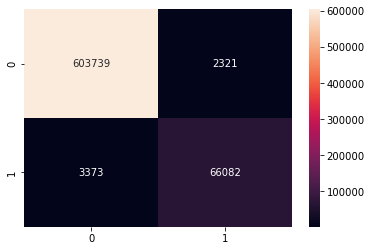

*******************************************


In [28]:
import lightgbm 
from lightgbm import LGBMClassifier 
hyp=[]
feature_importance_lgb=[]
feature_importance_values_lgb=[]
loss_all=[]

sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])


#hyperparameter tuning

for i in [100,200,500,1000]:
    for j in [30,60,80,100]:
        model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1, num_leaves=j,learning_rate=0.1, n_estimators=i, objective=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,subsample=1.0, subsample_freq=0, colsample_bytree=1.0,reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1)
        print("Model is training")
        model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
        print("Done")
        y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
        y_pred=model.predict(X_cv[:sample_points_cv])
        loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
        hyp.append((i,j))
        loss_all.append(loss)
hyperparameter=lowest(hyp,loss_all)
print("********************************************")
print("Training model with best hyperparameter")

# training model with best hyperparameter

model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1,
               learning_rate=0.1, n_estimators=hyperparameter[0],  num_leaves=hyperparameter[1],
               subsample_for_bin=200000, objective=None, 
               class_weight=None, min_split_gain=0.0, 
               min_child_weight=0.001, min_child_samples=20,
               subsample=1.0, subsample_freq=0, colsample_bytree=1.0,
               reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1)
print("Model is training")
model.fit(X_train,Y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)
print("*******************************************")
